<a href="https://colab.research.google.com/github/Daramluv/Google_colab/blob/main/Housing_Prices_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vecstack
!pip install mlxtend

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19861 sha256=5e2dc0dd41ef77a9c4c47d288ed90f127aee41482b21d4cfe9f20229a8943e6c
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [ ]:
!pip install scikit-learn

In [ ]:
pip install sklearn-genetic-opt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.feature_selection import SelectorMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from collections import Counter #for Smote,
from sklearn.model_selection import train_test_split

# Import libraries for feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read files
trainfile = r'/content/train.csv'
train_data = pd.read_csv(trainfile)

testfile = r'/content/test.csv'
test_data = pd.read_csv(testfile)

print(train_data.shape)
print(train_data.head())
print()
print(test_data.shape)
print(test_data.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub  

In [ ]:
#Extract Target Column before doing missing value substitutions and one-hot encoding======
Target_Train_Cols = train_data["SalePrice"] #make copy of target column
train_data = train_data.drop(["SalePrice"], axis=1) #extracting training data without the target column

print(train_data.shape)

(1460, 80)


In [ ]:
#DROP COLUMNS WITH LOTS OF MISSING VALUES===============================
#CAN ALSO DROP ROWS WITH LOTS OF MISSING VALUES
#Combine Train data and test data first so that the SAME COLUMNS are DROPPED in each
combined_Data = pd.concat([train_data, test_data], keys=[0,1])

combined_Data.isnull().sum().sort_values(ascending=False)

,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageQual,159
GarageCond,159
GarageYrBlt,159


In [ ]:
#Define threshold for dropping columns
percent=int(0.6*(combined_Data.shape[0]))
print(percent)
#Drop columns that have less than "thresh" number of non_Nans
td1=combined_Data.dropna(thresh=percent,axis=1)
print(td1.shape)

1751
(2919, 74)


In [ ]:
#look at what other columns have missing values
td1.isnull().sum().sort_values(ascending=False)

,0
LotFrontage,486
GarageYrBlt,159
GarageFinish,159
GarageQual,159
GarageCond,159
GarageType,157
BsmtExposure,82
BsmtCond,82
BsmtQual,81
BsmtFinType2,80


In [ ]:
#NOW IMPUTE MISSING VALUES FOR THE OTHER COLUMNS=========================
#IMPUTE (SUBSTITUTE) MEAN VALUES FOR NaN IN NUMERIC COLUMNS
numeric=td1.select_dtypes(include=['int','float64']).columns
for num in numeric:
  td1[num]=td1[num].fillna(td1[num].mean())

#IMPUTE (SUBSTITUTE) MODE VALUES FOR NaN IN CATEGORICAL COLUMNS
train_cat_cols = td1.select_dtypes(exclude=['int','float64']).columns#selecting the categorical columns
for colss in train_cat_cols:
  if(td1.iloc[0][colss]=="N"):
        td1[colss]=td1[colss].fillna("N")
  else:
    td1[colss]=td1[colss].fillna(td1[colss].mode())

print(td1.head(20))

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition
0 0    1          60       RL    65.000000     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

In [ ]:
#CHECK IF THERE ARE ANY REMAINING MISSING VALUES
td1.isnull().sum().sort_values(ascending=False)

,0
GarageCond,159
GarageFinish,159
GarageQual,159
GarageType,157
BsmtCond,82
BsmtExposure,82
BsmtQual,81
BsmtFinType2,80
BsmtFinType1,79
MSZoning,4


In [ ]:
#DROP COLUMNS THAT STILL HAVE NULL VALUES
print(td1.shape)
td1 = td1.drop(columns=["GarageCond","GarageFinish","GarageQual","GarageType","BsmtCond","BsmtExposure","BsmtQual","BsmtFinType2","BsmtFinType1","MSZoning","Utilities","Functional","Electrical","Exterior2nd","Exterior1st","KitchenQual","SaleType"])
print(td1.isnull().sum().sort_values(ascending=False))
print(td1.shape)

(2919, 74)
Id               0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
CentralAir       0
Heating          0
MSSubClass       0
TotalBsmtSF      0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
MasVnrArea       0
ExterQual        0
ExterCond        0
F

In [ ]:
#DO ONE-HOT ENCODING ON CATEGORICAL VARIABLES==============================================
#The below function returns a list of categorical features which are not numeric.
train_cat_cols = td1.select_dtypes(exclude=['float','int']).columns #selecting the categorical columns
print(train_cat_cols.shape)
print(train_cat_cols)

#If there are categorical columns which are encoded as numeric ones
#then we need to explicitly enter the column names in a list and concatenate the two lists in python.
#ONE-HOT ENCODING-generate one-hot encoding on a common basis -THIS TAKES 30 MINS

combined_Data = pd.get_dummies(td1,train_cat_cols)
combined_Data.head(10)

(20,)
Index(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive', 'SaleCondition'], dtype='object')


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0 0   1          60    65.000000     8450            7            5       2003          2003       196.0       706.0         0.0      150.0        856.0       856       854             0       1710           1.0           0.0         2         1             3             1             8           0       2003.0         2.0       548.0           0           61              0          0            0         0        0       2    2008        False         True         False         False         False          True            False            False            False             True             False              False          False          False              True           True          False          False                 False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False   
  1   2          20    80.000000     9600            6            8       1976          1976         0.0       978.0         0.0      284.0       1262.0      1262         0             0       1262           0.0           1.0         2         0             3             1             6           1       1976.0         2.0       460.0         298            0              0          0            0         0        0       5    2007        False         True         False         False         False          True            False            False            False             True             False              False           True          False             False           True          False          False                 False                 False                False                 False                 False                 False                 False                 False                 False                False                 False                 False               False   
  2   3          60    68.000000    11250            7            5       2001          2002       162.0       486.0         0.0      434.0        920.0       920       866             0       1786           1.0           0.0         2         1             3             1             6           1       2001.0         2.0       608.0           0           42              0          0            0         0        0       9    2008        False         True          True         False         False         False            False            False            False             True             False              False          False          False              True           True          False          False                 False                 False                False                 False                 False                  True                 False                 False                 False                False                 False                 False               False   
 

In [ ]:
num_train = train_data.shape[0]  # train_data
num_test = test_data.shape[0]    # test_data


train_data_final = combined_Data.iloc[:num_train, :]
test_data_final = combined_Data.iloc[num_train:, :]

print("Final train_data shape:", train_data_final.shape)
print("Final test_data shape:", test_data_final.shape)

Final train_data shape: (1460, 161)
Final test_data shape: (1459, 161)


In [ ]:
Target_Train_Cols = Target_Train_Cols.reset_index(drop=True)
train_data_final = train_data_final.reset_index(drop=True)

train_data_final['SalePrice'] = Target_Train_Cols
print(train_data_final.head())
print("train_data_final shape:", train_data_final.shape)

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0

In [ ]:
target_column = 'SalePrice'
y = train_data_final[target_column]
X = train_data_final.drop(columns=[target_column])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1168, 161)
X_test shape: (292, 161)
y_train shape: (1168,)
y_test shape: (292,)


In [ ]:
mean_sale_price = train_data_final['SalePrice'].mean()
print(f"Average SalePrice: {mean_sale_price:.2f}")

Average SalePrice: 180921.20


In [ ]:
#Decision Tree Regressor ========================================================================

clf = DecisionTreeRegressor(random_state=42)  # create model
clf.fit(X_train, y_train)  # train
clf_predict_Train=clf.predict(X_train)

y_pred_train = clf.predict(X_train)  # train prediction
y_pred_test = clf.predict(X_test)  # test prediction
clf_predict = y_pred_test
# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# result
print("RMSE (Training Data): {:.10f}".format(rmse_train))
print("RMSE (Test Data): {:.10f}".format(rmse_test))
print("accuracy Score (training) for Decision TreeE: {:.6f}".format(clf.score(X_test, y_test)))

RMSE (Training Data): 0.0000000000
RMSE (Test Data): 38146.3555169115
accuracy Score (training) for Decision TreeE: 0.810289


In [ ]:
#DT without feature selection file
y_pred_submission = clf.predict(test_data_final)

df_submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission
})

df_submission.to_csv('DT_without_feature_selection.csv', index=False)

In [ ]:
# DT hyperparameter tuning with cross-validation

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# GridSearchCV
grid_search.fit(X_train, y_train)

print("Best hyperparameter:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Best model RMSE (Test Data): {rmse_test:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameter: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best model RMSE (Test Data): 39501.6552


In [ ]:
#Decision Tree prediction with hyperparameter tuning
y_pred_test = best_model.predict(X_test)

y_pred_new = best_model.predict(test_data_final)

df_submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_new
})

df_submission.to_csv('DT_hyperparameter_tuning.csv', index=False)


In [ ]:
# Random Forest Regressor Model without feature selection
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)

rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)  # Training data prediction
y_pred_test_rf = rf_model.predict(X_test)   # Test data prediction

# RMSE
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

# R^2
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Random Forest - RMSE (Training): {rmse_train_rf:.4f}, RMSE (Test): {rmse_test_rf:.4f}")
print(f"Random Forest - R^2 (Training): {r2_train_rf:.4f}, R^2 (Test): {r2_test_rf:.4f}")

Random Forest - RMSE (Training): 12241.6480, RMSE (Test): 29799.0085
Random Forest - R^2 (Training): 0.9749, R^2 (Test): 0.8842


In [ ]:
#RF without feature selection file
y_pred_submission = rf_model.predict(test_data_final)

df_submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission
})

df_submission.to_csv('RF_without_feature_selection.csv', index=False)

In [ ]:
#Random Forest hyperparameter tuning with cross-validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)
R
grid_search.fit(X_train, y_train)

print("Best hyperparameter:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_test = best_rf_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Best Model RMSE (Test Data): {rmse_test:.4f}")

y_pred_submission = best_rf_model.predict(test_data_final)
df_submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission
})
df_submission.to_csv('RF_hyperparameter_tuning.csv', index=False)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best hyperparameter: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model RMSE (Test Data): 32427.4889


In [ ]:
# SVR Model without feature selection
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svr_model.fit(X_train, y_train)

y_pred_train_svr = svr_model.predict(X_train)  # Training data prediction
y_pred_test_svr = svr_model.predict(X_test)   # Test data prediction

rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_pred_train_svr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_pred_test_svr))

r2_train_svr = r2_score(y_train, y_pred_train_svr)
r2_test_svr = r2_score(y_test, y_pred_test_svr)

print(f"SVR - RMSE (Training): {rmse_train_svr:.4f}, RMSE (Test): {rmse_test_svr:.4f}")
print(f"SVR - R^2 (Training): {r2_train_svr:.4f}, R^2 (Test): {r2_test_svr:.4f}")


SVR - RMSE (Training): 78895.0556, RMSE (Test): 88669.3265
SVR - R^2 (Training): -0.0436, R^2 (Test): -0.0250


In [ ]:
#SVM Model file without feature selection
y_pred_submission_svr = svr_model.predict(test_data_final)

df_submission_svr = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission_svr
})

df_submission_svr.to_csv('SVR_without_feature_selection.csv', index=False)

In [ ]:
# SVR with Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf']
}

svr_model = SVR()

# GridSearchCV
grid_search = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best hyperparameter:", grid_search.best_params_)

best_svr_model = grid_search.best_estimator_
y_pred_test = best_svr_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Best model RMSE (Test Data): {rmse_test:.4f}")

y_pred_submission = best_svr_model.predict(test_data_final)
df_submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission
})
df_submission.to_csv('SVR_hyperparameter_tuning.csv', index=False)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameter: {'C': 100, 'epsilon': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
Best model RMSE (Test Data): 88669.3733


In [ ]:
#MLP Model without feature selection
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam',
                         learning_rate='adaptive', max_iter=500, random_state=42)

mlp_model.fit(X_train, y_train)

y_pred_train_mlp = mlp_model.predict(X_train)
y_pred_test_mlp = mlp_model.predict(X_test)

rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_pred_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_pred_test_mlp))
r2_train_mlp = r2_score(y_train, y_pred_train_mlp)
r2_test_mlp = r2_score(y_test, y_pred_test_mlp)

print(f"MLP - RMSE (Training): {rmse_train_mlp:.4f}, RMSE (Test): {rmse_test_mlp:.4f}")
print(f"MLP - R^2 (Training): {r2_train_mlp:.4f}, R^2 (Test): {r2_test_mlp:.4f}")


MLP - RMSE (Training): 29619.9919, RMSE (Test): 34580.9330
MLP - R^2 (Training): 0.8529, R^2 (Test): 0.8441


In [ ]:
# MLP Model without feature selection file
y_pred_submission_mlp = mlp_model.predict(test_data_final)


df_submission_mlp = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission_mlp
})

df_submission_mlp.to_csv('MLP_without_feature_selection.csv', index=False)

In [ ]:
#MLP wiht hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50, 25), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

random_search = RandomizedSearchCV(
    estimator=mlp_model,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


RandomizedSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'hidden_layer_sizes': [(50, 25),
                                                               (100, 50, 25)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'max_iter': [200, 500],
                                        'solver': ['adam']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
best_mlp_model = random_search.best_estimator_

y_pred_test = best_mlp_model.predict(X_test)

# RMSE

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Best model RMSE (Test Data): {rmse_test:.4f}")

Best model RMSE (Test Data): 34580.9330


In [ ]:
y_pred_submission = best_mlp_model.predict(test_data_final)

df_submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission
})

df_submission.to_csv('MLP_hyperparameter_tuning.csv', index=False)


In [ ]:
#Gradient Boosting Regressor Model without feature selection
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,
                                     min_samples_split=2, min_samples_leaf=1, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_pred_train_gb))
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))
r2_train_gb = r2_score(y_train, y_pred_train_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

print(f"Gradient Boosting - RMSE (Training): {rmse_train_gb:.4f}, RMSE (Test): {rmse_test_gb:.4f}")
print(f"Gradient Boosting - R^2 (Training): {r2_train_gb:.4f}, R^2 (Test): {r2_test_gb:.4f}")


Gradient Boosting - RMSE (Training): 14197.0733, RMSE (Test): 28697.5855
Gradient Boosting - R^2 (Training): 0.9662, R^2 (Test): 0.8926


In [ ]:
#Gradient Boosting without feature selection
y_pred_submission_gb = gb_model.predict(test_data_final)

df_submission_gb = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission_gb
})

df_submission_gb.to_csv('GB_without_feature_selection.csv', index=False)

In [ ]:
#GB with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,  # 5-Fold validation
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# GridSearchCV
grid_search.fit(X_train, y_train)

print("Best hyperparameter:", grid_search.best_params_)

best_gb_model = grid_search.best_estimator_
y_pred_test = best_gb_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Best Model RMSE (Test Data): {rmse_test:.4f}")

y_pred_submission = best_gb_model.predict(test_data_final)
df_submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission
})
df_submission.to_csv('GB_hyperparameter_tuning.csv', index=False)



Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best hyperparameter: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
Best Model RMSE (Test Data): 27895.3373


In [ ]:
# GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=4,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(S_Train, y_train)


print("Best Parameters:", grid_search.best_params_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
best_meta_model = grid_search.best_estimator_

print("Best Meta Model:", best_meta_model)


Best Meta Model: LogisticRegression(C=0.01, random_state=42, solver='liblinear')


In [ ]:
# Stacking Model setup without feature selection
# Base models
new_X_train = X_train
new_X_test = X_test

base_models = [
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    MLPClassifier(max_iter=1000, random_state=42),
    LinearSVC(max_iter=1000, random_state=42)
]

S_Train, S_Test = stacking(
    base_models,
    new_X_train,
    y_train,
    test_data_final,
    regression=False,
    mode='oof_pred_bag',
    needs_proba=False,
    save_dir=None,
    metric=accuracy_score,
    n_folds=4,
    stratified=True,
    shuffle=True,
    random_state=42,
    verbose=2
)

meta_model = best_meta_model
meta_model.fit(S_Train, y_train)

y_pred_train_stack = meta_model.predict(S_Train)
y_pred_test_stack = meta_model.predict(S_Test)

train_accuracy = accuracy_score(y_train, y_pred_train_stack)
print(f"Stacking Train Accuracy: {train_accuracy:.4f}")


task:         [classification]
n_classes:    [571]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [RandomForestClassifier]
    fold  0:  [0.02054795]
    fold  1:  [0.02054795]
    fold  2:  [0.03082192]
    fold  3:  [0.01369863]
    ----
    MEAN:     [0.02140411] + [0.00611424]
    FULL:     [0.02140411]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.00684932]
    fold  1:  [0.00000000]
    fold  2:  [0.01369863]
    fold  3:  [0.00684932]
    ----
    MEAN:     [0.00684932] + [0.00484320]
    FULL:     [0.00684932]

model  2:     [MLPClassifier]
    fold  0:  [0.00342466]
    fold  1:  [0.01369863]
    fold  2:  [0.00684932]
    fold  3:  [0.00342466]
    ----
    MEAN:     [0.00684932] + [0.00419433]
    FULL:     [0.00684932]

model  3:     [LinearSVC]
    fold  0:  [0.01369863]
    fold  1:  [0.00684932]
    fold  2:  [0.00684932]
    fold  3:  [0.00684932]
    ----
    MEAN:     [0.00856164] + [0.00296584]
    FULL:     [0

In [ ]:
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(
    S_Train, y_train, test_size=0.2, random_state=42
)

meta_model.fit(X_train_meta, y_train_meta)

y_pred_val = meta_model.predict(X_val_meta)

# RMSE R²
rmse_val = np.sqrt(mean_squared_error(y_val_meta, y_pred_val))
r2_val = r2_score(y_val_meta, y_pred_val)

print(f"Validation RMSE: {rmse_val}")
print(f"Validation R²: {r2_val}")

Validation RMSE: 84933.10900875561
Validation R²: -0.11600321924535395


In [ ]:
#Test set prediction
y_pred_new_test_stack = meta_model.predict(S_Test)

submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'Predicted': y_pred_new_test_stack
})

submission.to_csv('ST_without_feature_selection.csv', index=False)

In [ ]:
# Top 10 features
importances = clf.feature_importances_
indices = np.argsort(importances)[-10:]

important_features = X_train.columns[indices]
print("Top 10 important features:", important_features)

Top 10 important features: Index(['GarageArea', 'LotFrontage', '1stFlrSF', 'LotArea', 'BsmtFinSF1', 'YearBuilt', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'OverallQual'], dtype='object')


In [ ]:
model = SelectFromModel(clf, prefit=True, max_features=10)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

In [ ]:
clf_selected = DecisionTreeRegressor(random_state=42)
clf_selected.fit(X_train_selected, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
X_test_selected = model.transform(test_data_final)
y_pred_submission = clf_selected.predict(X_test_selected)

In [ ]:
#DT predcition with important feature
df_submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred_submission
})

df_submission.to_csv('DT_with_important_feature.csv', index=False)


In [ ]:
# Random forest with feature selection
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

feature_importances = rfr.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = sorted_indices[:10]
print("Top 10 Important Features:", top_features)

Top 10 Important Features: [ 4 16 12 14  9 13  3 27  6 26]


In [ ]:
X_train_selected = X_train.iloc[:, top_features]
X_test_selected = X_test.iloc[:, top_features]

print("Filtered X_train shape:", X_train_selected.shape)
print("Filtered X_test shape:", X_test_selected.shape)

Filtered X_train shape: (1168, 10)
Filtered X_test shape: (292, 10)


In [ ]:
rfr_selected = RandomForestRegressor(random_state=42)
rfr_selected.fit(X_train_selected, y_train)

y_pred_train = rfr_selected.predict(X_train_selected)
y_pred_test = rfr_selected.predict(X_test_selected)

# RMSE와 R²
from sklearn.metrics import mean_squared_error, r2_score
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"RMSE (Train): {rmse_train:.4f}, RMSE (Test): {rmse_test:.4f}")
print(f"R² (Train): {r2_train:.4f}, R² (Test): {r2_test:.4f}")

RMSE (Train): 11437.9365, RMSE (Test): 28855.1718
R² (Train): 0.9781, R² (Test): 0.8914


In [ ]:
trained_features = X_train_selected.columns
print("Trained Features:", trained_features)

Trained Features: Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'LotArea', 'GarageArea', 'YearBuilt', 'GarageCars'], dtype='object')


In [ ]:
test_data_selected = test_data.reindex(columns=trained_features, fill_value=0)
print("Test data after alignment:", test_data_selected.shape)

Test data after alignment: (1459, 10)


In [ ]:
test_data_selected = test_data_selected[X_train_selected.columns]

In [ ]:
#RF predcition with important feature

y_pred_submission = rfr_selected.predict(test_data_selected)

submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_pred_submission
})

submission.to_csv('RF_with_important_feature.csv', index=False)

In [ ]:
#SVM important feature selection
linear_svm = LinearSVC(random_state=42)
linear_svm.fit(X_train, y_train)

feature_importance = np.abs(linear_svm.coef_[0])
print("Feature Importance:", feature_importance)

sorted_indices = np.argsort(feature_importance)[::-1]

n = 10
print(f"Top {n} Features:", sorted_indices[:n])

Feature Importance: [6.53190432e-04 2.99288845e-04 1.68430595e-05 1.74868952e-05
 4.69091028e-06 9.46973465e-06 2.26171064e-04 1.19122717e-04
 2.16049216e-04 3.70485040e-04 1.96065586e-04 1.96749409e-05
 1.94094395e-04 4.51204530e-04 1.58808023e-04 2.69366327e-04
 8.79378880e-04 5.54784551e-06 1.44150721e-06 1.12831469e-07
 6.66283659e-07 1.03131873e-06 1.67199813e-08 5.30887356e-06
 1.38861118e-06 1.71505831e-04 4.53891939e-06 1.42690711e-03
 1.86813168e-04 4.01980994e-03 9.14835687e-04 8.05464440e-06
 3.95141449e-06 3.48042373e-08 3.46802066e-04 6.62176879e-05
 1.09089889e-04 4.43520792e-07 4.88485574e-07 3.32446080e-06
 1.61258495e-08 3.22771829e-09 3.38877915e-06 1.64127533e-07
 1.30629773e-08 1.50610921e-06 1.72826451e-06 1.01488732e-06
 1.83952012e-07 2.05402606e-07 1.33991546e-10 1.44934071e-06
 1.58204830e-06 1.45234274e-06 8.47407713e-08 1.01129765e-09
 8.58279613e-11 1.62987982e-08 2.38431722e-06 5.87258794e-08
 4.58842659e-08 2.23254424e-08 1.67083340e-06 2.60565842e-09
 8.7

In [ ]:
#SVR importance
selected_features = sorted_indices[:n]

X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = test_data_final.iloc[:, selected_features]
# SVM
linear_svr = LinearSVR(random_state=42)
linear_svr.fit(X_train_selected, y_train)

y_pred = linear_svr.predict(X_test_selected)

submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'SalePrice': y_pred
})

submission.to_csv('SVR_importance_feature.csv', index=False)

In [ ]:
# SFS Feature selection with RF
clf = RandomForestRegressor(random_state=42)

sfs = SFS(clf,
          k_features=10,
          forward=True,
          floating=False,
          verbose=2,
          scoring='r2',
          cv=3)


sfs = sfs.fit(X_train, y_train)


print("Selected features:", sfs.k_feature_names_)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   19.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.2min

[2024-11-23 19:42:25] Features: 1/10 -- score: 0.6641935561824832[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   22.2s

[2024-11-23 19:43:40] Features: 2/10 -- score: 0.7177154014991718[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   33.8s

[2024-11-23 19:45:46] Features: 3/10 -- score: 0.7916745463968132[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   40.7s

[2024-11-23 19:48:18] Features: 4/10 -- score: 0.8342423604463352[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   46.6s

[2024-11-23 19:51:15] Features: 5/10 -- score: 0.8446628667239692[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   54.4s

[2024-11-23 19:54:42] Features: 6/10 -- score: 0.8516819919023085[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   57.0s

[2024-11-23 19:58:18] Features: 7/10 -- score: 0.85471

Selected features: ('LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'Condition1_Norm')



[2024-11-23 20:10:24] Features: 10/10 -- score: 0.8634429848302752

In [ ]:
selected_features = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

print(X_train_selected.shape, X_test_selected.shape)

(1168, 10) (292, 10)


In [ ]:
clf_selected = RandomForestRegressor(random_state=42)
clf_selected.fit(X_train_selected, y_train)

y_pred_test = clf_selected.predict(X_test_selected)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse)


Test RMSE: 28017.96508142425


In [ ]:
print("Selected Features: ", selected_features)
print("Test Data Columns: ", test_data.columns)

Selected Features:  [3, 4, 5, 6, 9, 12, 15, 16, 23, 82]
Test Data Columns:  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF'

In [ ]:
print(sfs.k_feature_names_)
print(sfs.k_score_)


('LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'Condition1_Norm')
0.8634429848302752


In [ ]:
selected_features = list(sfs.k_feature_names_)

X_test_selected = test_data_final[selected_features]

X_test_selected = X_test_selected.fillna(X_test_selected.mean())

print("Test dataset after feature selection:", X_test_selected.shape)


Test dataset after feature selection: (1459, 10)


In [ ]:
train_features = list(rf_model.feature_names_in_)

test_features = list(X_test_selected.columns)

missing_features = [feat for feat in train_features if feat not in test_features]
print("Missing features in test data:", missing_features)

extra_features = [feat for feat in test_features if feat not in train_features]
print("Extra features in test data:", extra_features)

Missing features in test data: ['Id', 'MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhoo

In [ ]:
for feat in missing_features:
    X_test_selected[feat] = 0

In [ ]:
X_test_selected = X_test_selected[train_features]


In [ ]:
y_pred_test = rf_model.predict(X_test_selected)
print("Predictions for test dataset:", y_pred_test[:10])

Predictions for test dataset: [104900.94088431 128404.54137163 159123.08097188 159060.36923505
 196647.36269231 143100.36405085 134572.32887433 130801.49040045
 146977.81884527  93979.53300376]


In [ ]:
train_features = list(rf_model.feature_names_in_)
test_features = list(X_test_selected.columns)

missing_features = [feat for feat in train_features if feat not in test_features]
for feat in missing_features:
    X_test_selected[feat] = 0

X_test_selected = X_test_selected[train_features]

y_pred_test = rf_model.predict(X_test_selected)
print("Predictions for test dataset:", y_pred_test[:10])

predictions_df = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': y_pred_test
})
predictions_df.to_csv('RF_SFS.csv', index=False)


Predictions for test dataset: [104900.94088431 128404.54137163 159123.08097188 159060.36923505
 196647.36269231 143100.36405085 134572.32887433 130801.49040045
 146977.81884527  93979.53300376]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# SVR with SFS

svr = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.1)

sfs = SFS(
    svr,
    k_features=10,
    forward=True,
    floating=False,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

sfs = sfs.fit(X_train, y_train)

print("Selected features:", sfs.k_feature_names_)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:   29.0s finished

[2024-11-23 20:26:55] Features: 1/10 -- score: -0.0459395281679346[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   30.0s finished

[2024-11-23 20:27:25] Features: 2/10 -- score: -0.04583334472487399[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:   30.4s finished

[2024-11-23 20:27:56] Features: 3/10 -- score: -0.045740411936944[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 ta

Selected features: ('OverallQual', 'FullBath', 'GarageCars', 'LandContour_Bnk', 'Neighborhood_Gilbert', 'Condition2_RRAe', 'RoofMatl_ClyTile', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood')


[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   32.0s finished

[2024-11-23 20:31:35] Features: 10/10 -- score: -0.045669255786019436

In [ ]:
selected_features = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = test_data_final.iloc[:, selected_features]


In [ ]:
# SVR Model prediction
svr.fit(X_train_selected, y_train)

y_pred = svr.predict(X_test_selected)

submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'Predicted': y_pred
})

submission.to_csv('SVR_SFS_predictions.csv', index=False)



In [ ]:
# SVR Model
svr = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.1)

# SBS
sbs = SFS(
    svr,
    k_features=10,
    forward=False,
    floating=False,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# SBS
sbs = sbs.fit(X_train, y_train)

print("Selected features:", sbs.k_feature_names_)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 161 out of 161 | elapsed:  1.3min finished

[2024-11-23 20:42:05] Features: 160/10 -- score: -0.04760585293505685[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.4min finished

[2024-11-23 20:43:27] Features: 159/10 -- score: -0.04760584552450875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 159 out of 159 | elapsed:  1.3min finished

[2024-11-23 20:44:47] Features: 158/10 -- score: -0.04760583955059028[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Do

Selected features: ('Fireplaces', 'GarageCars', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Condition1_PosA', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'HeatingQC_Ex')


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.5s finished

[2024-11-23 22:01:45] Features: 10/10 -- score: -0.04645147206983761

In [ ]:
selected_features = list(sbs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = test_data_final.iloc[:, selected_features]

In [ ]:
# SVR prediction
svr.fit(X_train_selected, y_train)

y_pred = svr.predict(X_test_selected)

submission = pd.DataFrame({
    'Id': test_data_final['Id'],
    'Predicted': y_pred
})

submission.to_csv('SVR_SBS_predictions.csv', index=False)

In [ ]:
from sklearn_genetic import GASearchCV

#SVR Genetic Algorithm, GA
svr = SVR(kernel='rbf', epsilon=0.1)

param_grid = {
    "C": Continuous(0.1, 1000, distribution="log-uniform"),
    "gamma": Continuous(0.001, 1, distribution="log-uniform"),
    "epsilon": Continuous(0.01, 1),
}

ga_search = GASearchCV(
    estimator=svr,
    cv=3,
    scoring="r2",
    population_size=20,
    generations=30,
    param_grid=param_grid,
    verbose=1,
    n_jobs=-1
)

ga_search.fit(X_train, y_train)

print("Best Features:", ga_search.best_params_)
print("Best Estimator:", ga_search.best_estimator_)


gen	nevals	fitness   	fitness_std	fitness_max	fitness_min
0  	20    	-0.0476056	4.55775e-06	-0.047589  	-0.0476174 
1  	40    	-0.0476033	6.14698e-06	-0.0475879 	-0.0476059 
2  	40    	-0.0475963	8.63803e-06	-0.0475879 	-0.0476059 
3  	40    	-0.0475926	7.68854e-06	-0.0475878 	-0.0476059 
4  	40    	-0.0475879	4.57005e-08	-0.0475878 	-0.0475879 
5  	40    	-0.0475878	9.27245e-08	-0.0475875 	-0.0475879 
6  	40    	-0.0475808	3.05259e-05	-0.0474477 	-0.0475879 
7  	40    	-0.0475808	3.05275e-05	-0.0474477 	-0.0475879 
8  	40    	-0.0475364	9.2978e-05 	-0.0473385 	-0.0475879 
9  	40    	-0.0475489	8.16708e-05	-0.0473383 	-0.0475895 
10 	40    	-0.0474974	0.000106153	-0.0473385 	-0.0475878 
11 	40    	-0.0474818	9.50608e-05	-0.0473385 	-0.0475878 
12 	40    	-0.047432 	9.17762e-05	-0.0473385 	-0.0475878 
13 	40    	-0.0473931	5.45243e-05	-0.0473383 	-0.0474482 
14 	40    	-0.0473603	4.3588e-05 	-0.0473383 	-0.0474475 
15 	40    	-0.0473439	2.37814e-05	-0.0473383 	-0.0474475 
16 	40    	-0.

In [ ]:
y_pred = ga_search.predict(test_data_final)

submission = pd.DataFrame({
    "Id": test_data_final["Id"],
    "Predicted": y_pred
})

submission.to_csv("SVR_GA_predictions.csv", index=False)

<Axes: title={'center': 'Fitness average evolution over generations'}, xlabel='generations', ylabel='fitness (score)'>

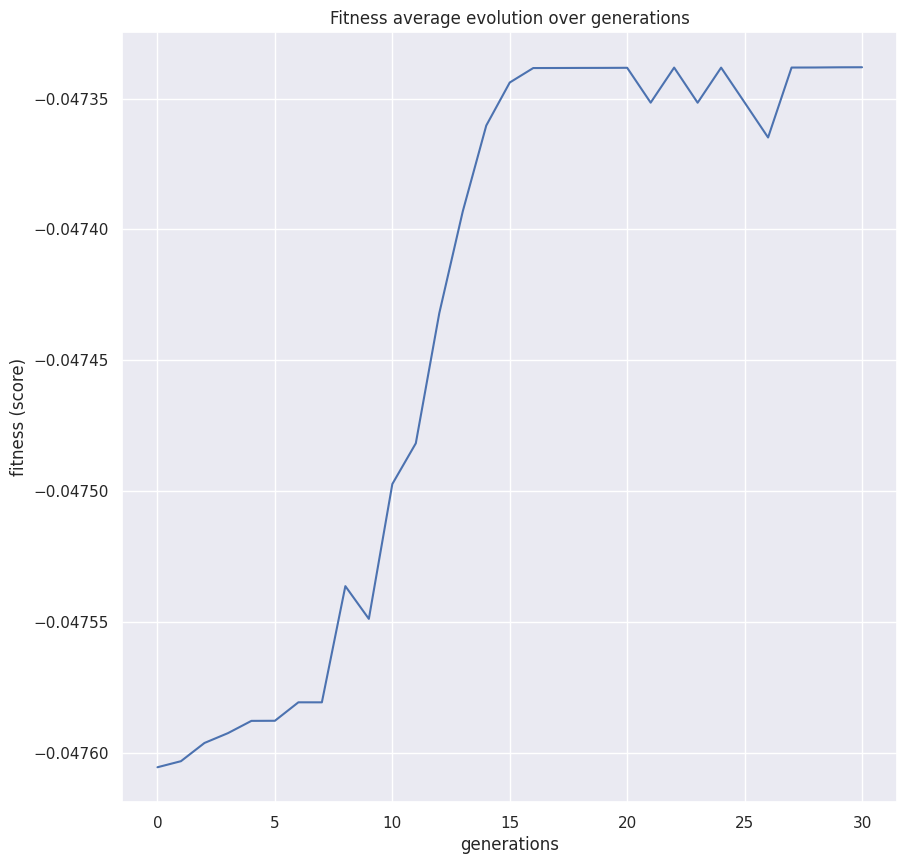

In [ ]:
plot_fitness_evolution(ga_search)

In [ ]:
#


In [ ]:
#Done